In [2]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import missingno as msno
from datetime import datetime
import datetime

#from google.cloud import datastore
import time

#import ta

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
kaggle_dat = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2020-12-31.csv')

In [5]:
gemini_dat15 = pd.read_csv('gemini_BTCUSD_2015_1min.csv',skiprows=[0])
gemini_dat16 = pd.read_csv('gemini_BTCUSD_2016_1min.csv',skiprows=[0])
gemini_dat17 = pd.read_csv('gemini_BTCUSD_2017_1min.csv',skiprows=[0])
gemini_dat18 = pd.read_csv('gemini_BTCUSD_2018_1min.csv',skiprows=[0])
gemini_dat19 = pd.read_csv('gemini_BTCUSD_2019_1min.csv',skiprows=[0])
gemini_dat20 = pd.read_csv('gemini_BTCUSD_2020_1min.csv',skiprows=[0])

In [6]:
gemini_dat = pd.concat([gemini_dat15,gemini_dat16,gemini_dat17,gemini_dat18,gemini_dat19,gemini_dat20])


In [7]:
kaggle_dat.shape,gemini_dat.shape

((4727777, 8), (2774546, 8))

In [8]:
kaggle_dat.count(),gemini_dat.count()

(Timestamp            4727777
 Open                 3484305
 High                 3484305
 Low                  3484305
 Close                3484305
 Volume_(BTC)         3484305
 Volume_(Currency)    3484305
 Weighted_Price       3484305
 dtype: int64,
 Unix Timestamp    2774546
 Date              2774546
 Symbol            2774546
 Open              2774546
 High              2774546
 Low               2774546
 Close             2774546
 Volume            2774546
 dtype: int64)

Although data from Kaggle has more NaN values comparing to the data from Gemini, the available data from Kaggle is more than that from Gemini. We can plot both datasets to see the difference.

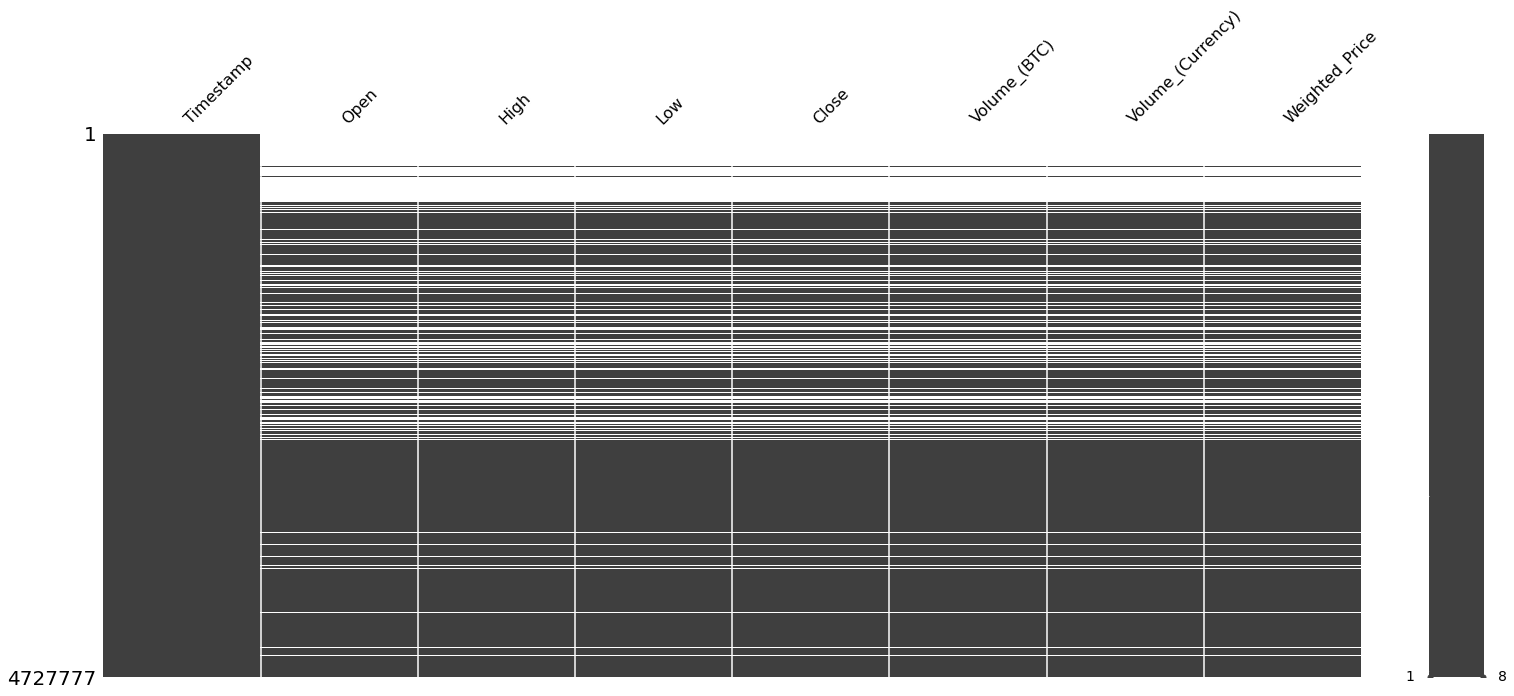

In [9]:
msno.matrix(kaggle_dat)
plt.show()

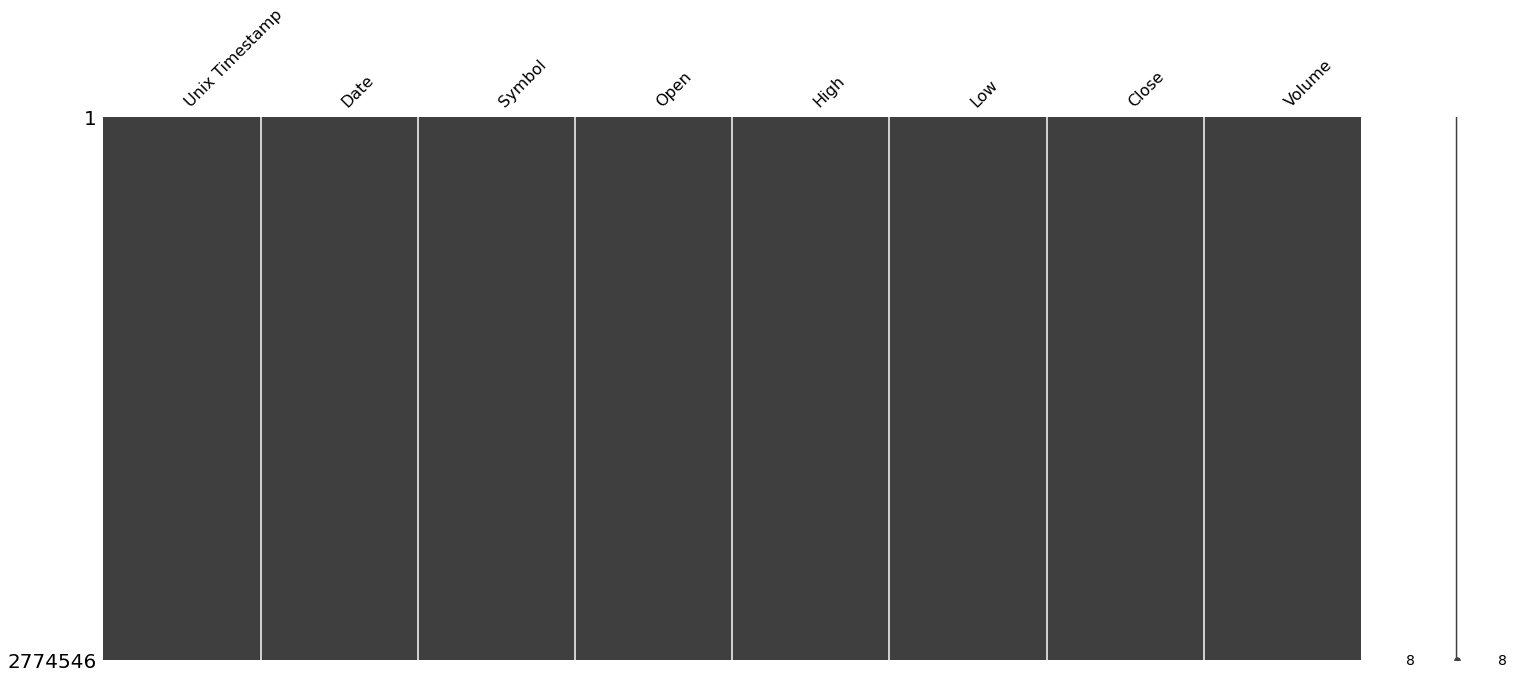

In [10]:
msno.matrix(gemini_dat)
plt.show()

Results suggest in Kaggle dataset, there are more missing values in the earlier time period. In Gemini dataset, there are minimal missing values. Moreover, the locations missing values in Kaggle dataset seem consistent across columns.

In [11]:
kaggle_dat['Timestamp'] = pd.to_datetime(kaggle_dat['Timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M')
kaggle_dat.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
kaggle_dat = kaggle_dat.set_index('Timestamp')

In [13]:
kaggle_dat.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
2011-12-31 07:53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-12-31 07:56,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
kaggle_dat.index = pd.DatetimeIndex(kaggle_dat.index)
kaggle_dat.index

DatetimeIndex(['2011-12-31 07:52:00', '2011-12-31 07:53:00',
               '2011-12-31 07:54:00', '2011-12-31 07:55:00',
               '2011-12-31 07:56:00', '2011-12-31 07:57:00',
               '2011-12-31 07:58:00', '2011-12-31 07:59:00',
               '2011-12-31 08:00:00', '2011-12-31 08:01:00',
               ...
               '2020-12-30 23:51:00', '2020-12-30 23:52:00',
               '2020-12-30 23:53:00', '2020-12-30 23:54:00',
               '2020-12-30 23:55:00', '2020-12-30 23:56:00',
               '2020-12-30 23:57:00', '2020-12-30 23:58:00',
               '2020-12-30 23:59:00', '2020-12-31 00:00:00'],
              dtype='datetime64[ns]', name='Timestamp', length=4727777, freq=None)

In [15]:
kaggle_dat.dtypes

Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [19]:
kaggle_dat[['Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price']] = \
kaggle_dat[['Open','High','Low','Close','Volume_(BTC)','Volume_(Currency)','Weighted_Price']].interpolate(method='time')
kaggle_dat.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.000000,4.39
2011-12-31 07:53:00,4.39,4.39,4.39,4.39,0.555046,2.436653,4.39
2011-12-31 07:54:00,4.39,4.39,4.39,4.39,0.654511,2.873305,4.39
2011-12-31 07:55:00,4.39,4.39,4.39,4.39,0.753977,3.309958,4.39
2011-12-31 07:56:00,4.39,4.39,4.39,4.39,0.853442,3.746611,4.39


In [18]:
kaggle_dat.shape

(4727777, 7)

In [20]:
kaggle_dat.to_csv('/Users/linxi/Desktop/historical_price_preprocessed (time).csv')